In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
import seaborn as sns

## Import data

In [13]:
url = 'https://raw.githubusercontent.com/arofiqimaulana/dataset/master/iris.csv'
df = pd.read_csv(url)

In [14]:
df = df.sample(frac=1).reset_index(drop=True)

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,4.9,3.6,1.4,0.1,0,setosa
1,6.1,3.0,4.9,1.8,2,virginica
2,6.3,3.3,6.0,2.5,2,virginica
3,6.7,3.0,5.0,1.7,1,versicolor
4,5.1,3.7,1.5,0.4,0,setosa


In [16]:
X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

## Normalisasi

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

## Clustering using k-Medoids

In [18]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(scaled_features)

In [20]:
labels = pd.DataFrame(kmedoids.labels_)
labels.columns = ['label_kmeans']

In [21]:
df['labels'] = labels

In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,labels
0,4.9,3.6,1.4,0.1,0,setosa,0
1,6.1,3.0,4.9,1.8,2,virginica,1
2,6.3,3.3,6.0,2.5,2,virginica,2
3,6.7,3.0,5.0,1.7,1,versicolor,2
4,5.1,3.7,1.5,0.4,0,setosa,0
...,...,...,...,...,...,...,...
145,4.9,2.4,3.3,1.0,1,versicolor,1
146,4.6,3.2,1.4,0.2,0,setosa,0
147,6.8,2.8,4.8,1.4,1,versicolor,2
148,7.2,3.2,6.0,1.8,2,virginica,2


# Visualize using PCA
Visualisasi data paling mudah menggunakan grafik 2 dimensi. Karena kita punya lebih dari 2 variabel, maka kita bisa gunakan PCA untuk menjadikannya menjadi 2 variabel baru.

In [25]:
pca = PCA(2)

arr_pca = pca.fit_transform(X)

In [26]:
df_pca = pd.DataFrame(arr_pca)
df_pca.columns = ['PC1','PC2']
df_pca['labels'] = labels

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

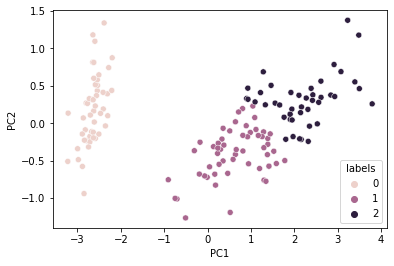

In [27]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="labels")

# Pemilihan k terbaik
Pemilihan k terbaik bisa menggunakan teknik silhouette. Teknik ini menggunakan SSE (Sum of Square) di setiap nilai k. SSE yang sudah tidak terlalu jauh, maka bisa katakan k itulah yang terbaik. 

Berdasarkan grafik di bawah ini, bisa kita katakan bahwa jumlah cluster paling optimal adalah 3. Hal ini karena nilai SSE yang sudah tidak terlalu jauh jika kita pake k=4,k=5,k=6 dst.

In [32]:
kmedoids_kwargs = {
    "metric":'euclidean', 
    "method":'alternate',
    "max_iter": 300,
    "random_state": 42
}

In [33]:
sse = []
for k in range(1, 11):
    kmeans = KMedoids(n_clusters=k, **kmedoids_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

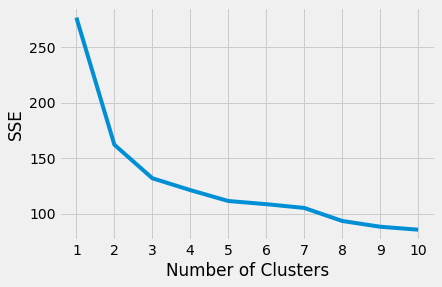

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Reference
- https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
- https://scikit-learn-extra.readthedocs.io/en/stable/install.html